# Mistral Telegram Calendar Bot - Interactive Testing

This notebook is for testing the individual components of the Mistral Telegram Calendar Bot interactively.

In [1]:
import sys
import os
import json
from datetime import datetime
from PIL import Image
import io
import base64
from IPython.display import display, HTML, Image as IPImage

# Add parent directory to sys.path so we can import our modules
sys.path.append('..')

## 1. Environment Setup

First, let's load our environment variables and check that everything is set up correctly.

In [2]:
# Let's make sure our environment variables are loaded
from dotenv import load_dotenv
load_dotenv(dotenv_path='../.env')

from config import MISTRAL_API_KEY, GOOGLE_CREDENTIALS_FILE

print(f"Mistral API Key available: {'Yes' if MISTRAL_API_KEY else 'No'}")
print(f"Google Credentials file exists: {'Yes' if os.path.exists(GOOGLE_CREDENTIALS_FILE) else 'No'}")

Mistral API Key available: Yes
Google Credentials file exists: No


## 2. Testing Mistral Engine

Let's test the Mistral engine for intent detection and event extraction.

In [3]:
import sys
sys.path.append('../src')
from mistral_engine import MistralEngine

engine = MistralEngine()

### 2.1 Test Intent Detection with Text Messages

Let's try a few different messages and see what intents are detected.

In [4]:
def test_intent(message):
    """Test intent detection for a message."""
    intent_data, extracted_info, _ = engine.process_message(message)
    
    print(f"Message: \"{message}\"")
    print(f"Detected intent: {intent_data.get('intent')}")
    print(f"Confidence: {intent_data.get('confidence', 0):.2f}")
    print(f"Explanation: {intent_data.get('explanation', '')}")
    
    if intent_data.get('intent') == 'add_event':
        print("\nExtracted Event Information:")
        print(json.dumps(extracted_info, indent=2))
    
    print("\n" + "-"*50 + "\n")

# Test messages
test_messages = [
    "Hello! How are you today?",
    "What can you do for me?",
    "Schedule a meeting with John tomorrow at 3pm",
    "Remind me to buy groceries on Saturday at 10am",
    "Add a dentist appointment for next Tuesday at 2:30pm at Smile Dental Clinic"
]

for message in test_messages:
    test_intent(message)

Message: "Hello! How are you today?"
Detected intent: greet
Confidence: 0.95
Explanation: The user's message starts with 'Hello!' and asks 'How are you today?', which are typical greetings and inquiries about well-being.

--------------------------------------------------



Error calling Mistral: API error occurred: Status 429
{"message":"Requests rate limit exceeded"}


Message: "What can you do for me?"
Detected intent: other
Confidence: 0.00
Explanation: Could not detect intent

--------------------------------------------------



Error calling Mistral: API error occurred: Status 429
{"message":"Requests rate limit exceeded"}


Message: "Schedule a meeting with John tomorrow at 3pm"
Detected intent: other
Confidence: 0.00
Explanation: Could not detect intent

--------------------------------------------------

Message: "Remind me to buy groceries on Saturday at 10am"
Detected intent: add_event
Confidence: 0.95
Explanation: The user is asking to be reminded of a task ('buy groceries') at a specific time ('Saturday at 10am'), which indicates they want to add an event to their calendar.

Extracted Event Information:
{
  "summary": "Buy groceries",
  "location": null,
  "description": "Reminder to buy groceries",
  "start_time": "2025-03-22T10:00:00",
  "end_time": null,
  "confidence": 0.9
}

--------------------------------------------------

Message: "Add a dentist appointment for next Tuesday at 2:30pm at Smile Dental Clinic"
Detected intent: add_event
Confidence: 0.95
Explanation: The user is specifying a particular event (dentist appointment) with a date (next Tuesday), time (2:30pm), and location (Smile De

### 2.2 Custom Message Test

Try your own custom message:

In [5]:
custom_message = "Remind me to pick up Tom after school on Friday at 3pm"
test_intent(custom_message)

Message: "Remind me to pick up Tom after school on Friday at 3pm"
Detected intent: add_event
Confidence: 0.95
Explanation: The user is asking to be reminded of a specific task ('pick up Tom') at a particular time ('Friday at 3pm'). This indicates the intent to add an event to the calendar.

Extracted Event Information:
{
  "summary": "Pick up Tom after school",
  "location": null,
  "description": "Reminder to pick up Tom after school",
  "start_time": "2025-03-21T15:00:00",
  "end_time": null,
  "confidence": 0.9
}

--------------------------------------------------



## 3. Testing Image Processing

Now let's test the image processing capabilities. First, we need to load an image.

In [6]:
def process_image(image_path):
    """Process an image and extract event information."""
    # Display the image
    display(IPImage(filename=image_path, width=400))
    
    # Read the image file
    with open(image_path, 'rb') as f:
        image_data = f.read()
    
    # Process the image with Mistral
    intent_data, extracted_info, _ = engine.process_message(image_data, is_image=True)
    
    print(f"Detected intent: {intent_data.get('intent')}")
    print(f"Confidence: {intent_data.get('confidence', 0):.2f}")
    
    print("\nExtracted Information:")
    print(json.dumps(extracted_info, indent=2))
    
    return extracted_info

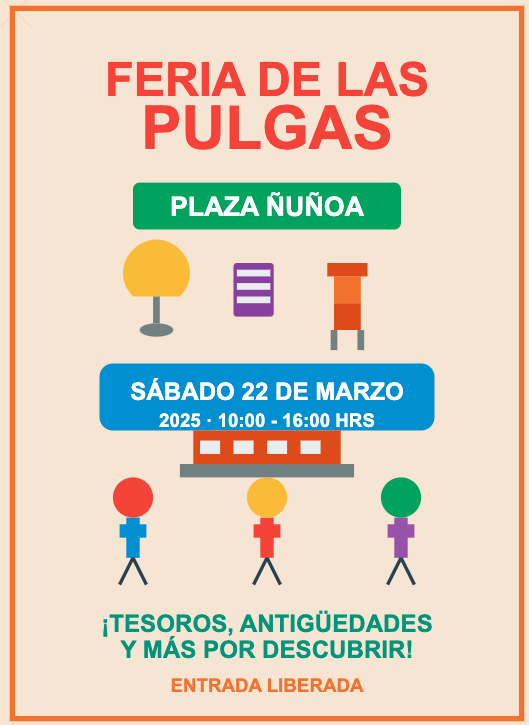

Detected intent: add_event
Confidence: 0.95

Extracted Information:
{
  "extracted_text": "FERIA DE LAS PULGAS PLAZA \u00d1U\u00d1OA S\u00c1BADO 22 DE MARZO 2025 - 10:00 - 16:00 HRS \u00a1TESOROS, ANTIG\u00dcEDADES Y M\u00c1S POR DESCUBRIR! ENTRADA LIBERADA",
  "summary": "Feria de las Pulgas",
  "location": "Plaza \u00d1u\u00f1oa",
  "description": "Evento de feria de pulgas con tesoros, antig\u00fcedades y m\u00e1s por descubrir. Entrada liberada.",
  "start_time": "2025-03-22T10:00:00",
  "end_time": "2025-03-22T16:00:00",
  "confidence": 0.95
}


In [7]:
# Replace with your image path
image_path = "../data/test_image.png"

# Check if the image exists
if os.path.exists(image_path):
    extracted_info = process_image(image_path)
else:
    print(f"Image not found: {image_path}")
    print("Please add test images to the test_images folder")

## 4. Testing Calendar Link Generation

Let's test generating Google Calendar links from event information.

In [9]:
import sys
sys.path.append('../src')
from calendar_events import generate_calendar_link

def display_calendar_link(event_data):
    """Generate and display a calendar link for the given event data."""
    link = generate_calendar_link(event_data)
    
    print("Event Details:")
    print(f"Title: {event_data.get('summary')}")
    print(f"Start: {event_data.get('start_time')}")
    print(f"End: {event_data.get('end_time')}")
    print(f"Location: {event_data.get('location')}")
    
    print(f"\nCalendar Link: {link}")
    
    # Create a clickable HTML link
    display(HTML(f'<a href="{link}" target="_blank">Add to Google Calendar</a>'))

In [10]:
# Create a sample event
from datetime import datetime, timedelta

# Create event for tomorrow at 3pm
tomorrow = datetime.now() + timedelta(days=1)
start_time = tomorrow.replace(hour=15, minute=0, second=0, microsecond=0)
end_time = start_time + timedelta(hours=1)

sample_event = {
    'summary': 'Team Meeting',
    'location': 'Conference Room A',
    'description': 'Weekly team sync to discuss project progress',
    'start_time': start_time.isoformat(),
    'end_time': end_time.isoformat()
}

display_calendar_link(sample_event)

Event Details:
Title: Team Meeting
Start: 2025-03-19T15:00:00
End: 2025-03-19T16:00:00
Location: Conference Room A

Calendar Link: https://calendar.google.com/calendar/render?action=TEMPLATE&text=Team Meeting&details=Weekly team sync to discuss project progress&location=Conference Room A&dates=20250319T150000/20250319T160000


### 4.1 Use the extracted event from image

If we successfully extracted an event from an image above, let's generate a calendar link for it.

In [11]:
# Check if we have extracted event info from an image
if 'extracted_info' in locals() and extracted_info.get('summary') and extracted_info.get('start_time'):
    display_calendar_link(extracted_info)
else:
    print("No valid event information extracted from image.")

Event Details:
Title: Feria de las Pulgas
Start: 2025-03-22T10:00:00
End: 2025-03-22T16:00:00
Location: Plaza Ñuñoa

Calendar Link: https://calendar.google.com/calendar/render?action=TEMPLATE&text=Feria de las Pulgas&details=Evento de feria de pulgas con tesoros, antigüedades y más por descubrir. Entrada liberada.&location=Plaza Ñuñoa&dates=20250322T100000/20250322T160000


## 5. Full Flow Simulation

Finally, let's simulate the full flow from receiving a user message to generating a calendar link.

In [12]:
def simulate_full_flow(message):
    """Simulate the full bot flow."""
    print(f"User: {message}")
    
    # Step 1: Process the message
    intent_data, extracted_info, _ = engine.process_message(message)
    
    print(f"\nStep 1: Intent Detection")
    print(f"Detected intent: {intent_data.get('intent')}")
    print(f"Confidence: {intent_data.get('confidence', 0):.2f}")
    
    # Step 2: Extract event information if intent is add_event
    if intent_data.get('intent') == 'add_event':
        print(f"\nStep 2: Event Extraction")
        print("Extracted information:")
        print(json.dumps(extracted_info, indent=2))
        
        # Step 3: Generate calendar link
        if extracted_info.get('summary') and extracted_info.get('start_time'):
            print(f"\nStep 3: Calendar Link Generation")
            link = generate_calendar_link(extracted_info)
            print(f"Calendar Link: {link}")
            
            # Display a clickable link
            display(HTML(f'<a href="{link}" target="_blank">Add to Google Calendar</a>'))
            
            # Step 4: Generate bot response
            print(f"\nStep 4: Bot Response")
            print(f"Bot: I've found the following event details:\n")
            print(f"📅 {extracted_info.get('summary')}")
            print(f"📆 {extracted_info.get('start_time')}")
            if extracted_info.get('location'):
                print(f"📍 {extracted_info.get('location')}")
            if extracted_info.get('description'):
                print(f"📝 {extracted_info.get('description')}")
            print(f"\nYou can add this to your calendar using the link above.")
        else:
            print(f"\nNot enough information to create a calendar event.")
            print(f"Bot: I need more information about your event. Please provide at least a title and date/time.")
    else:
        print(f"\nBot: {get_response_for_intent(intent_data.get('intent'))}")

def get_response_for_intent(intent):
    """Get a sample response based on the intent."""
    responses = {
        'greet': "Hello! How can I help you with your calendar today?",
        'help': "I can help you add events to your calendar. Just tell me about the event, or send an image with event details.",
        'other': "I'm not sure what you're asking for. Can you try asking me to add an event to your calendar?"
    }
    return responses.get(intent, "I didn't understand that. Can you try again?")

In [14]:
# Test with a complex event description
simulate_full_flow("Can you schedule a team meeting for next Monday at 10am in the main conference room? We'll be discussing the Q3 marketing strategy.")

User: Can you schedule a team meeting for next Monday at 10am in the main conference room? We'll be discussing the Q3 marketing strategy.

Step 1: Intent Detection
Detected intent: add_event
Confidence: 0.95

Step 2: Event Extraction
Extracted information:
{
  "summary": "Team Meeting",
  "location": "main conference room",
  "description": "Discussing the Q3 marketing strategy",
  "start_time": "2025-03-24T10:00:00",
  "end_time": null,
  "confidence": 0.9
}

Step 3: Calendar Link Generation
Calendar Link: https://calendar.google.com/calendar/render?action=TEMPLATE&text=Team Meeting&details=Discussing the Q3 marketing strategy&location=main conference room&dates=20250324T100000/20250324T110000



Step 4: Bot Response
Bot: I've found the following event details:

📅 Team Meeting
📆 2025-03-24T10:00:00
📍 main conference room
📝 Discussing the Q3 marketing strategy

You can add this to your calendar using the link above.


In [15]:
# Try a greeting
simulate_full_flow("Hi there! How's it going?")

User: Hi there! How's it going?

Step 1: Intent Detection
Detected intent: greet
Confidence: 0.95

Bot: Hello! How can I help you with your calendar today?


## 6. Your Custom Tests

Feel free to add your own custom tests below:

In [ ]:
# Test with your own message
your_message = "" # Add your test message here
if your_message:
    simulate_full_flow(your_message)